# Libraries

In [1]:
# import statements
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

import joblib  # to save your final model

# Load In Data

In [2]:
# load in Data
milkweeds = pd.read_csv("milkweedData.csv")
milkweeds.head()

,name,longitude,latitude,wc2.1_2.5m_bio_1,wc2.1_2.5m_bio_2,wc2.1_2.5m_bio_3,wc2.1_2.5m_bio_4,wc2.1_2.5m_bio_5,wc2.1_2.5m_bio_6,wc2.1_2.5m_bio_7,...,co2_18,co2_19,co2_20,co2_21,co2_22,co2_23,co2_24,co2_25,co2_26,presence
0,Asclepias syriaca,30.567178,50.412366,8.201167,7.588333,24.431210,902.978699,24.299999,-6.760,31.059999,...,899285.0,1138050.0,1028180.0,993782.0,868928.0,1000600.0,1014290.0,771508.0,769400.0,1
1,Asclepias syriaca,-73.811565,41.054370,10.901333,11.156667,31.001074,910.576233,29.416000,-6.572,35.987999,...,391833.0,393025.0,393744.0,422125.0,418700.0,391505.0,417339.0,440972.0,425017.0,1
2,Asclepias syriaca,-95.243434,38.915703,12.825500,11.925667,29.939915,1012.143250,32.312000,-7.520,39.832001,...,384205.0,381496.0,378948.0,398577.0,396912.0,366913.0,388474.0,398691.0,397190.0,1
3,Asclepias syriaca,-73.948547,40.720712,12.241500,9.235666,27.480560,899.979309,29.480000,-4.128,33.607998,...,6458390.0,6484770.0,6346510.0,5921570.0,6004820.0,5730610.0,5795540.0,6148150.0,6229280.0,1
4,Asclepias syriaca,-82.724571,39.984277,10.548500,11.487667,31.363073,937.181274,28.900000,-7.728,36.627998,...,262803.0,260418.0,258439.0,286813.0,283996.0,260671.0,277053.0,283907.0,289985.0,1


## Some Feature Processing

In [3]:
# Names for Bioclimactic Variables
bio_labels = {
    "wc2.1_2.5m_bio_1": "BIO1: Annual Mean Temp",
    "wc2.1_2.5m_bio_2": "BIO2: Mean Diurnal Range",
    "wc2.1_2.5m_bio_3": "BIO3: Isothermality",
    "wc2.1_2.5m_bio_4": "BIO4: Temp Seasonality",
    "wc2.1_2.5m_bio_5": "BIO5: Max Temp of Warmest Mo",
    "wc2.1_2.5m_bio_6": "BIO6: Min Temp of Coldest Mo",
    "wc2.1_2.5m_bio_7": "BIO7: Annual Temp Range",
    "wc2.1_2.5m_bio_8": "BIO8: Mean Temp Wettest Qtr",
    "wc2.1_2.5m_bio_9": "BIO9: Mean Temp Driest Qtr",
    "wc2.1_2.5m_bio_10": "BIO10: Mean Temp Warmest Qtr",
    "wc2.1_2.5m_bio_11": "BIO11: Mean Temp Coldest Qtr",
    "wc2.1_2.5m_bio_12": "BIO12: Annual Precip",
    "wc2.1_2.5m_bio_13": "BIO13: Precip Wettest Mo",
    "wc2.1_2.5m_bio_14": "BIO14: Precip Driest Mo",
    "wc2.1_2.5m_bio_15": "BIO15: Precip Seasonality",
    "wc2.1_2.5m_bio_16": "BIO16: Precip Wettest Qtr",
    "wc2.1_2.5m_bio_17": "BIO17: Precip Driest Qtr",
    "wc2.1_2.5m_bio_18": "BIO18: Precip Warmest Qtr",
    "wc2.1_2.5m_bio_19": "BIO19: Precip Coldest Qtr",
    "CONS_MTHS": "Max Dry Months"
}

In [4]:
print(milkweeds.isna().sum())

name                  0
longitude            37
latitude             37
wc2.1_2.5m_bio_1     45
wc2.1_2.5m_bio_2     45
wc2.1_2.5m_bio_3     45
wc2.1_2.5m_bio_4     45
wc2.1_2.5m_bio_5     45
wc2.1_2.5m_bio_6     45
wc2.1_2.5m_bio_7     45
wc2.1_2.5m_bio_8     45
wc2.1_2.5m_bio_9     45
wc2.1_2.5m_bio_10    45
wc2.1_2.5m_bio_11    45
wc2.1_2.5m_bio_12    45
wc2.1_2.5m_bio_13    45
wc2.1_2.5m_bio_14    45
wc2.1_2.5m_bio_15    45
wc2.1_2.5m_bio_16    45
wc2.1_2.5m_bio_17    45
wc2.1_2.5m_bio_18    45
wc2.1_2.5m_bio_19    45
co2_1                 0
co2_2                37
co2_3                37
co2_4                37
co2_5                37
co2_6                37
co2_7                37
co2_8                37
co2_9                37
co2_10               37
co2_11               37
co2_12               37
co2_13               37
co2_14               37
co2_15               37
co2_16               37
co2_17               37
co2_18               37
co2_19               37
co2_20          

In [5]:
milkweeds = milkweeds.dropna(subset=['longitude', 'latitude'])

In [6]:
# Initialize the imputer
imputer = SimpleImputer(strategy='median')  # Change strategy to 'mean' if overfitted too much

In [7]:
# Separate syriaca and speciosa data
syriaca = milkweeds[milkweeds['name'] == 'Asclepias syriaca']
syriaca_features = syriaca.drop(columns=["name"])

speciosa = milkweeds[milkweeds['name'] == 'Asclepias speciosa']
speciosa_features = speciosa.drop(columns=["name"])

In [8]:
# Fit and transform, but KEEP column names and index
'''
syriaca_imputed = pd.DataFrame(
    imputer.fit_transform(syriaca_features),
    columns=syriaca_features.columns,
    index=syriaca_features.index
)

speciosa_imputed = pd.DataFrame(
    imputer.fit_transform(speciosa_features),
    columns=speciosa_features.columns,
    index=speciosa_features.index
)
'''

'\nsyriaca_imputed = pd.DataFrame(\n    imputer.fit_transform(syriaca_features),\n    columns=syriaca_features.columns,\n    index=syriaca_features.index\n)\n\nspeciosa_imputed = pd.DataFrame(\n    imputer.fit_transform(speciosa_features),\n    columns=speciosa_features.columns,\n    index=speciosa_features.index\n)\n'

# Test/Train Split

In [9]:
# X = all features except presence/name, y = presence
X_sy, y_sy = syriaca.drop(columns=["presence", "name"]), syriaca["presence"]
X_sp, y_sp = speciosa.drop(columns=["presence", "name"]), speciosa["presence"]

In [10]:
# 80% training, 20% testing
X_train_sy, X_test_sy, y_train_sy, y_test_sy = train_test_split(
    X_sy, y_sy, stratify=y_sy, test_size=0.2, random_state=27)

X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(
    X_sp, y_sp, stratify=y_sp, test_size=0.2, random_state=27)

In [11]:
# Impute separately
imputer = SimpleImputer(strategy='mean')

X_train_sy = pd.DataFrame(
    imputer.fit_transform(X_train_sy),
    columns=X_train_sy.columns,
    index=X_train_sy.index
)

X_test_sy = pd.DataFrame(
    imputer.transform(X_test_sy),
    columns=X_test_sy.columns,
    index=X_test_sy.index
)

X_train_sp = pd.DataFrame(
    imputer.fit_transform(X_train_sp),
    columns=X_train_sp.columns,
    index=X_train_sp.index
)

X_test_sp = pd.DataFrame(
    imputer.transform(X_test_sp),
    columns=X_test_sp.columns,
    index=X_test_sp.index
)

# Build & Initialize Model

In [12]:

# Define base models
rf = RandomForestClassifier(random_state=27)
glm = LogisticRegression(max_iter=1000)
gb = HistGradientBoostingClassifier(random_state=27)

# MaxEnt-like model (LogisticRegressionCV on presence + background only)
maxent = LogisticRegressionCV(cv=5, max_iter=1000)

# Store models to iterate over
models = [
    ("rf", rf),
    ("glm", glm),
    ("gb", gb)
]

## Train & Evaluate Base Models

In [13]:
# Initialize training & evaluation
predictions = {"syriaca": [], "speciosa": []}
aucs = {"syriaca": {}, "speciosa": {}}

# Dictionary of datasets
datasets = {
    "syriaca": (X_train_sy, y_train_sy),
    "speciosa": (X_train_sp, y_train_sp)
}

# Store feature tables
feature_tables = {}

In [ ]:
for species, (X_train, y_train) in datasets.items():
    feature_names = X_train.columns
    labeled_names = [bio_labels.get(col, col) for col in feature_names]

    for name, model in models:
        model.fit(X_train, y_train)

        # Get importances or coefficients by checking attributes in elif
        if hasattr(model, "feature_importances_"):
            importances = model.feature_importances_
        elif hasattr(model, "coef_"):
            importances = model.coef_[0]
        else:
            continue  # Skip if not supported

        # Build table
        feat_df = pd.DataFrame({
            'Feature': labeled_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        # Save it to desktop
        feature_tables[f"{species}_{name}"] = feat_df
        feat_df.to_csv(f"{species}_{name}_feature_importances.csv", index=False)
        print(f"\nTop features for {species} - {name}:")
        print(feat_df.head(5))

# Skip to Feature Importances under Visualizations to see this data loaded in



Top features for syriaca - rf:
      Feature  Importance
21      co2_1    0.427588
0   longitude    0.043056
22      co2_2    0.041897
23      co2_3    0.029789
24      co2_4    0.019504


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Top features for syriaca - glm:
                      Feature  Importance
13       BIO12: Annual Precip    0.000662
5      BIO4: Temp Seasonality    0.000621
19  BIO18: Precip Warmest Qtr    0.000198
17  BIO16: Precip Wettest Qtr    0.000166
18   BIO17: Precip Driest Qtr    0.000151

Top features for speciosa - rf:
                      Feature  Importance
21                      co2_1    0.291101
0                   longitude    0.043250
45                     co2_25    0.030867
19  BIO18: Precip Warmest Qtr    0.029198
1                    latitude    0.028546


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Top features for speciosa - glm:
                      Feature  Importance
5      BIO4: Temp Seasonality    0.000114
16  BIO15: Precip Seasonality    0.000029
36                     co2_16    0.000025
1                    latitude    0.000021
4         BIO3: Isothermality    0.000014


In [15]:
'''# For Syriaca
for name, model in models:
    model.fit(X_train_sy, y_train_sy)
    pred = model.predict_proba(X_test_sy)[:, 1]
    area = roc_auc_score(y_test_sy, pred)
    print(f"{name} AUC (syriaca): {area:.3f}")
    predictions["syriaca"].append(pred)
    aucs["syriaca"][name] = area
'''

'# For Syriaca\nfor name, model in models:\n    model.fit(X_train_sy, y_train_sy)\n    pred = model.predict_proba(X_test_sy)[:, 1]\n    area = roc_auc_score(y_test_sy, pred)\n    print(f"{name} AUC (syriaca): {area:.3f}")\n    predictions["syriaca"].append(pred)\n    aucs["syriaca"][name] = area\n'

In [16]:
'''# For Speciosa
for name, model in models:
    model.fit(X_train_sp, y_train_sp)
    pred = model.predict_proba(X_test_sp)[:, 1]
    area = roc_auc_score(y_test_sp, pred)
    print(f"{name} AUC (speciosa): {area:.3f}")
    predictions["speciosa"].append(pred)
    aucs["speciosa"][name] = area
'''

'# For Speciosa\nfor name, model in models:\n    model.fit(X_train_sp, y_train_sp)\n    pred = model.predict_proba(X_test_sp)[:, 1]\n    area = roc_auc_score(y_test_sp, pred)\n    print(f"{name} AUC (speciosa): {area:.3f}")\n    predictions["speciosa"].append(pred)\n    aucs["speciosa"][name] = area\n'

## Add MaxEnt Model to the Mix 

In [17]:
def fit_maxent_model(df, imputer=None, model=None, random_state=42):
    """
    Parameters:
    - df: DataFrame with 'presence' column 
    - imputer: fitted or unfitted SimpleImputer; if None, median imputation is used
    - model: scikit-learn model; if None, LogisticRegressionCV is used -- approximates MaxEnt
    - random_state: for reproducibility

    """

    if model is None:
        model = LogisticRegressionCV(cv=5, max_iter=1000)
    if imputer is None:
        imputer = SimpleImputer(strategy='median')

    # Filter presence and sample equal background
    presence = df[df["presence"] == 1]
    background = df[df["presence"] == 0].sample(n=len(presence), random_state=random_state)

    # Combine presence and background
    maxent_df = pd.concat([presence, background])

    # Drop non-feature columns (e.g., name), then impute
    X_raw = maxent_df.drop(columns=["presence", "name"])
    X_imputed = pd.DataFrame(imputer.fit_transform(X_raw), columns=X_raw.columns)
    y = maxent_df["presence"]

    model.fit(X_imputed, y)

    return model

In [18]:
# Fit MaxEnt models here
maxent_model_sy = fit_maxent_model(syriaca)
maxent_model_sp = fit_maxent_model(speciosa)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### AUC for MaxEnt and 

In [19]:
def evaluate_maxent_model(model, df_test, imputer=None):
    if imputer is None:
        imputer = SimpleImputer(strategy='mean')

    # Prepare test features
    X_test_raw = df_test.drop(columns=["presence", "name"])
    X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test_raw), columns=X_test_raw.columns)
    y_test = df_test["presence"]

    # Predict probabilities
    y_pred = model.predict_proba(X_test_imputed)[:, 1]

    # Compute AUC and ROC
    auc_score = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    return auc_score, fpr, tpr, y_pred

In [20]:
# MaxEnt Evaluation for syriaca
auc_sy, fpr_sy, tpr_sy, pred_sy = evaluate_maxent_model(maxent_model_sy, syriaca)
# MaxEnt Evaluation for speciosa
auc_sp, fpr_sp, tpr_sp, pred_sp = evaluate_maxent_model(maxent_model_sp, speciosa)

# Optionally print or plot
print(f"MaxEnt AUC (syriaca): {auc_sy:.3f}")
print(f"MaxEnt AUC (speciosa): {auc_sp:.3f}")


MaxEnt AUC (syriaca): 0.993
MaxEnt AUC (speciosa): 0.986


## Fit & Evaluate Ensemble Model

In [21]:
# Syriaca Voting Classifier
voting_sy = VotingClassifier(estimators=models, voting='soft')
voting_sy.fit(X_train_sy, y_train_sy)

voting_pred_sy_train = voting_sy.predict_proba(X_train_sy)[:, 1]
voting_pred_sy_test = voting_sy.predict_proba(X_test_sy)[:, 1]

voting_auc_sy_train = roc_auc_score(y_train_sy, voting_pred_sy_train)
voting_auc_sy_test = roc_auc_score(y_test_sy, voting_pred_sy_test)

print(f"Voting Ensemble AUC (syriaca) - Train: {voting_auc_sy_train:.3f}, Test: {voting_auc_sy_test:.3f}")
aucs["syriaca"]["voting_ensemble"] = voting_auc_sy_test


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Ensemble AUC (syriaca) - Train: 1.000, Test: 0.999


# Validate Results

### Feature Correlation Heatmap

Index([], dtype='object')


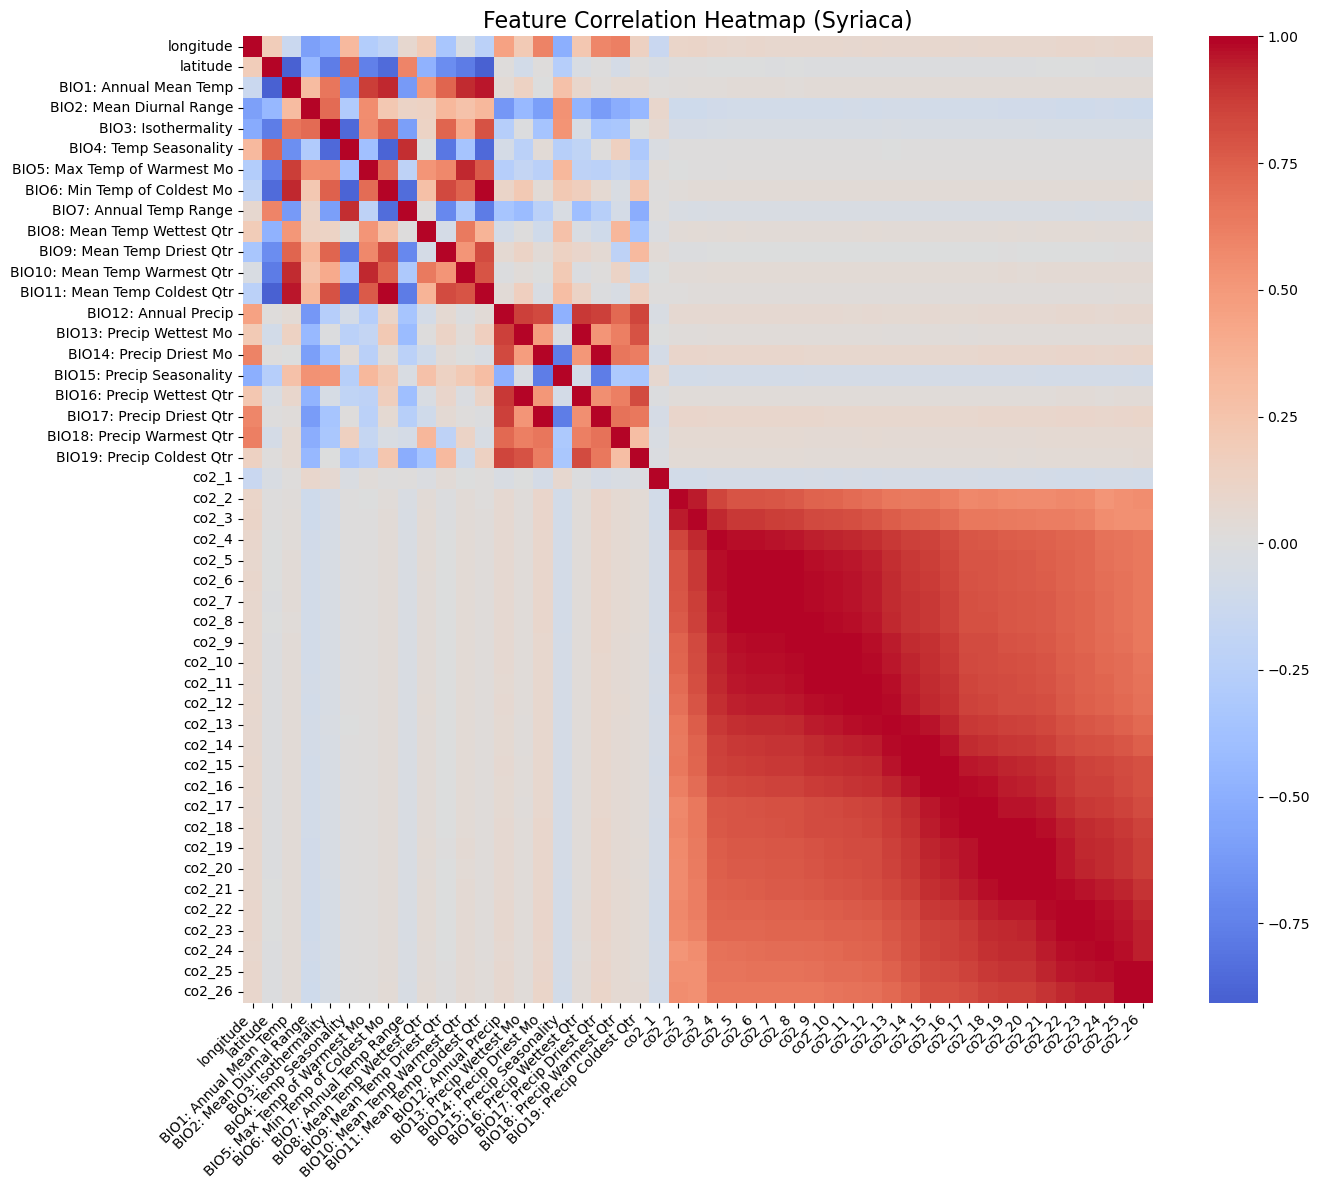

In [22]:
# Check for duplicated columns
print(X_train_sy.columns[X_train_sy.T.duplicated()])

# Only rename those that exist in your data
X_sy = X_sy.rename(columns={k: v for k, v in bio_labels.items() if k in X_sy.columns})

# Correlation matrix 
plt.figure(figsize=(14, 12))
sns.heatmap(X_sy.corr(), 
            cmap="coolwarm", 
            center=0, 
            annot=False,
            xticklabels=True,
            yticklabels=True)
plt.title("Feature Correlation Heatmap (Syriaca)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Directly use the column names that exist in X_sp
bioclim_col = [col for col in X_sp.columns if col.startswith('wc2.1_2.5m_bio')]

# Filter the bioclimatic variables based on exact matches
X_sp_bioclim = X_sp[bioclim_col]
# Rename to bioclimactic variable names instead of file name
X_sp_bioclim = X_sp_bioclim.rename(columns={k: v for k, v in bio_labels.items() if k in X_sp_bioclim.columns})

# Check the filtered bioclimatic data shape
#print("Shape of the filtered bioclimatic data:")
#print(X_sp_bioclim.shape)

### Visualize Bioclimactic vs Presence Data

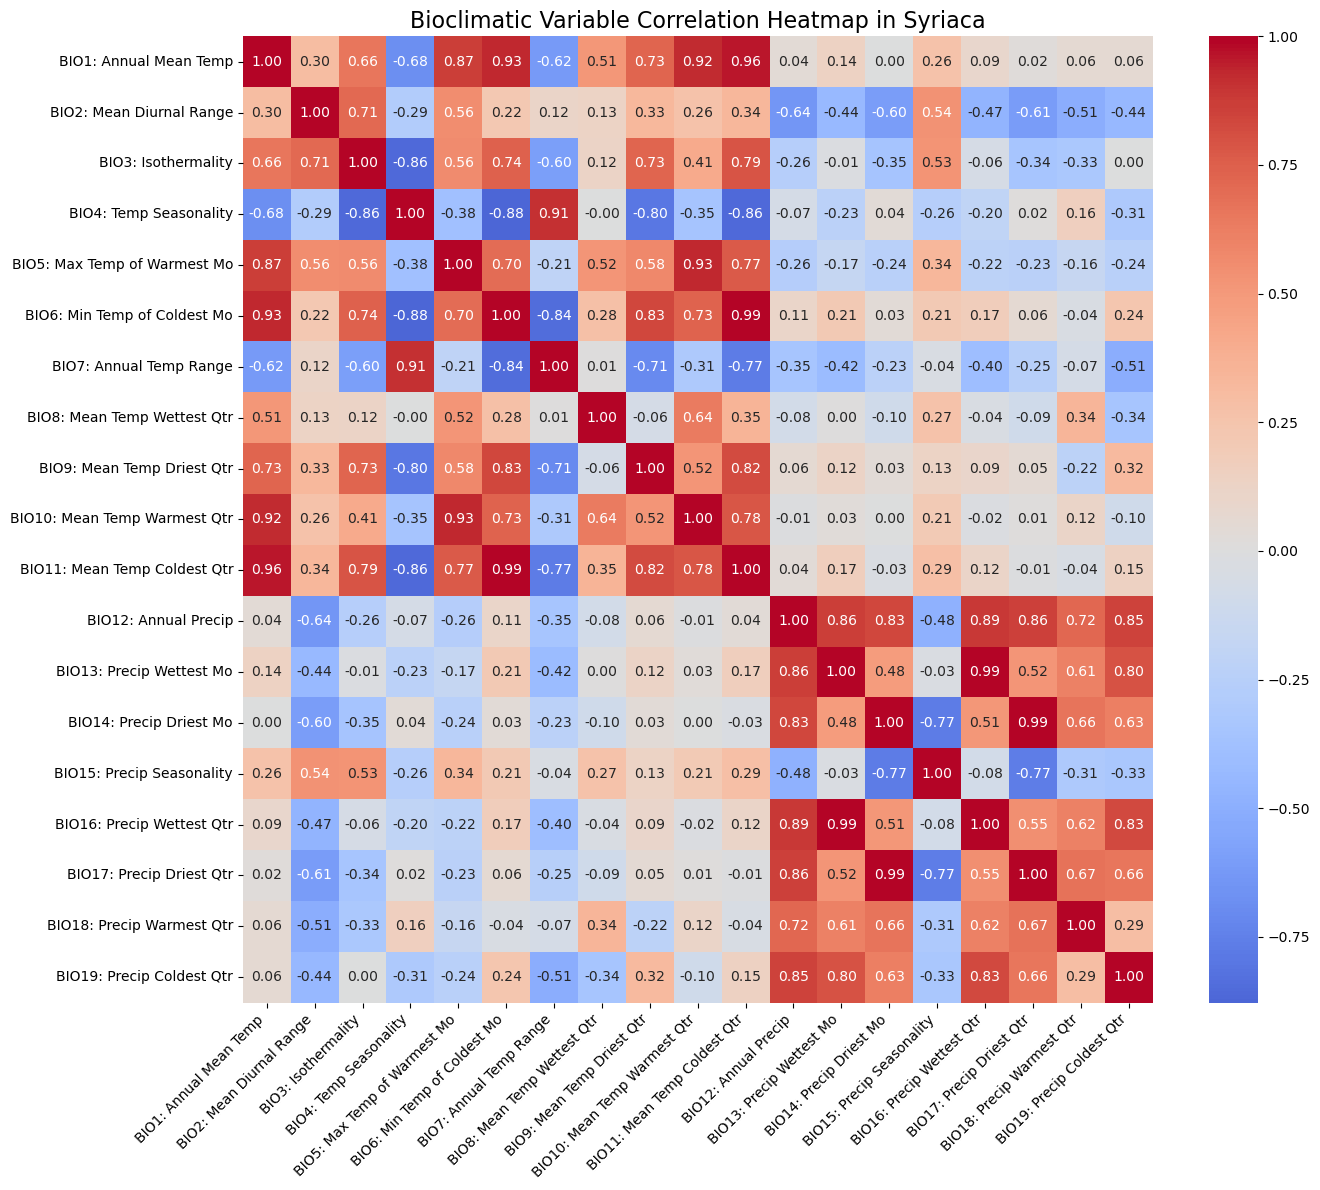

In [24]:
bioclim_cols = [v for k, v in bio_labels.items() if v in X_sy.columns]
X_sy_bioclim = X_sy[bioclim_cols]

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(X_sy_bioclim.corr(), 
            cmap="coolwarm", 
            center=0, 
            annot=True,  # optional: turn on to see correlation values
            fmt=".2f",
            xticklabels=True,
            yticklabels=True)
plt.title("Bioclimatic Variable Correlation Heatmap in Syriaca", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


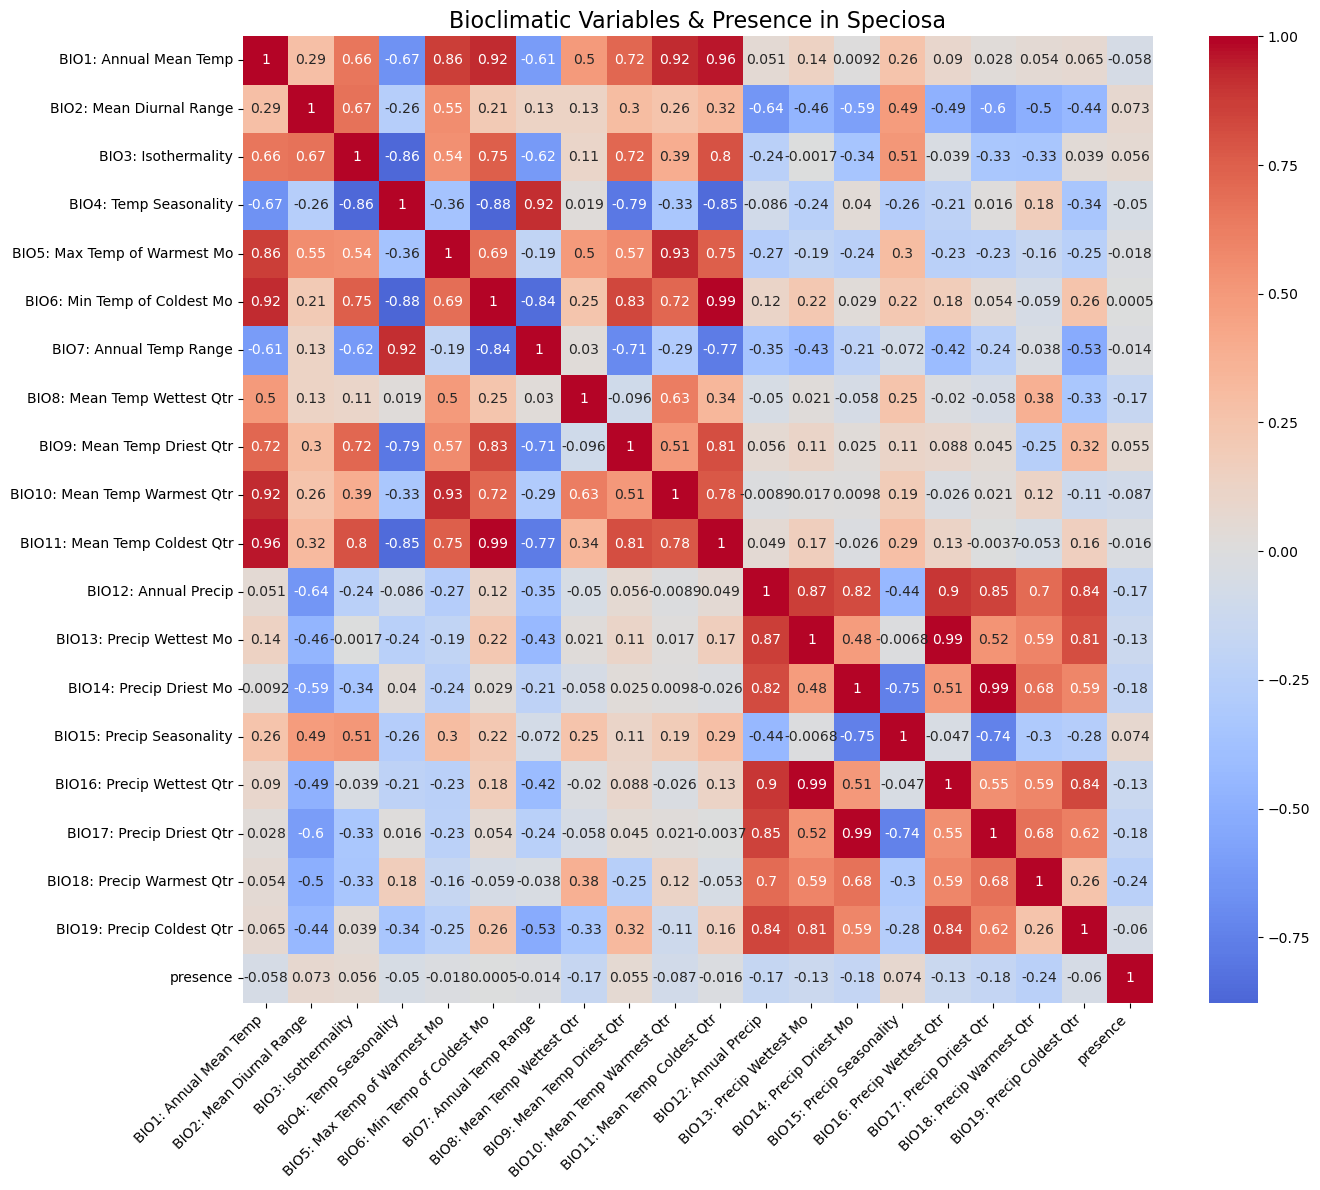

In [25]:
X_sp_bioclim['presence'] = y_sp
# Correlation matrix for bioclimatic variables and presence
plt.figure(figsize=(14, 12))
sns.heatmap(X_sp_bioclim.corr(), 
            cmap="coolwarm", 
            center=0, 
            annot=True,
            xticklabels=True,
            yticklabels=True)
plt.title("Bioclimatic Variables & Presence in Speciosa", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Visualize AUC Curves for Syriaca

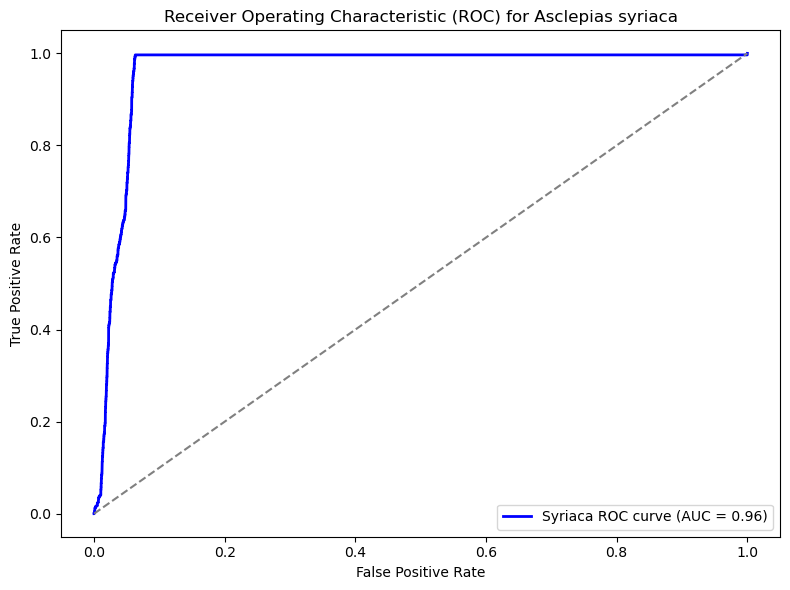

In [27]:
# Assuming the following:
# - X_train_sy, X_test_sy, y_train_sy, y_test_sy are your data splits
# - model is your trained model (e.g., RandomForest, XGBoost, etc.)

# Get the predicted probabilities for the test set (probability of class 1, presence)
y_prob_sy = model.predict_proba(X_test_sy)[:, 1]  # For syriaca, probability for the positive class

# Calculate the ROC curve
fpr_sy, tpr_sy, _ = roc_curve(y_test_sy, y_prob_sy)
roc_auc_sy = auc(fpr_sy, tpr_sy)

# Plot ROC curve for syriaca
plt.figure(figsize=(8, 6))
plt.plot(fpr_sy, tpr_sy, color='blue', lw=2, label=f"Syriaca ROC curve (AUC = {roc_auc_sy:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Asclepias syriaca')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### Visualize AUC Curves for Speciosa

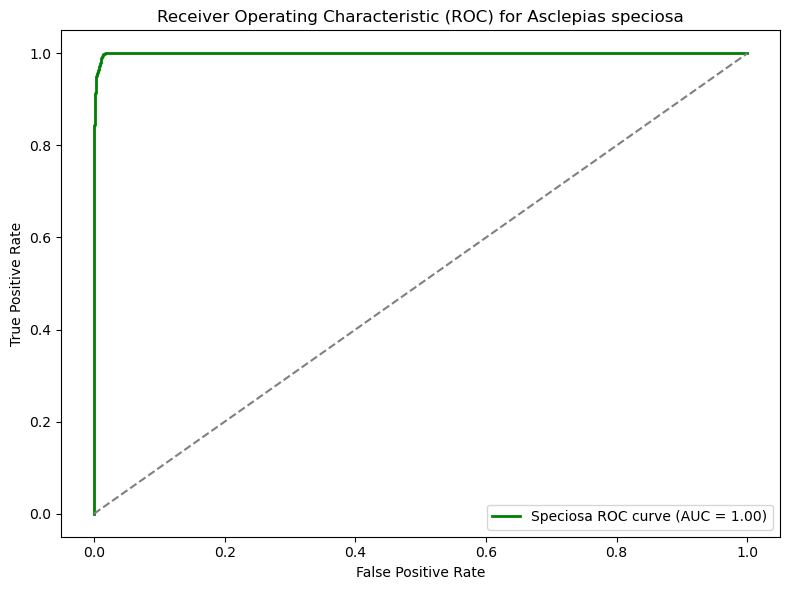

In [28]:
# Repeat the same steps for speciosa
y_prob_sp = model.predict_proba(X_test_sp)[:, 1]  # For speciosa, probability for the positive class
fpr_sp, tpr_sp, _ = roc_curve(y_test_sp, y_prob_sp)
roc_auc_sp = auc(fpr_sp, tpr_sp)

# Plot ROC curve for speciosa
plt.figure(figsize=(8, 6))
plt.plot(fpr_sp, tpr_sp, color='green', lw=2, label=f"Speciosa ROC curve (AUC = {roc_auc_sp:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Asclepias speciosa')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


### Feature Importances Graphs

In [29]:
species_list = ["syriaca", "speciosa"]
model_list = ["rf", "glm", "gb"]

feature_importance_dfs = {} # Initialize dictionary to store

for species in species_list:
    for model in model_list:
        filename = f"{species}_{model}_feature_importances.csv"
        if os.path.exists(filename):
            df = pd.read_csv(filename)
            feature_importance_dfs[f"{species}_{model}"] = df
            print(f"Loaded: {filename}")
        else:
            print(f"Missing: {filename}")

Loaded: syriaca_rf_feature_importances.csv
Loaded: syriaca_glm_feature_importances.csv
Missing: syriaca_gb_feature_importances.csv
Loaded: speciosa_rf_feature_importances.csv
Loaded: speciosa_glm_feature_importances.csv
Missing: speciosa_gb_feature_importances.csv


#### Random Forest Features

Columns in df_sy before rename: Index(['Feature', 'Importance'], dtype='object')
Columns in df_sp before rename: Index(['Feature', 'Importance'], dtype='object')
Columns in df_sy after rename: Index(['Feature', 'importance_syriaca'], dtype='object')
Columns in df_sp after rename: Index(['Feature', 'importance_speciosa'], dtype='object')


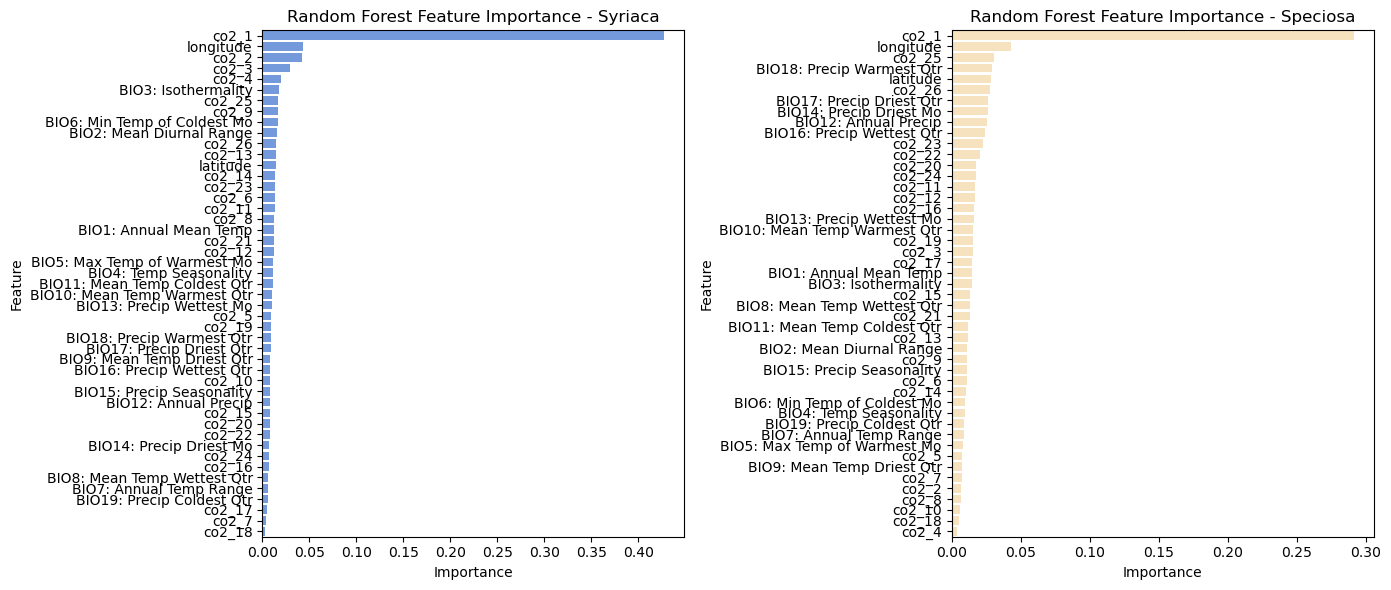

In [30]:
# Load the feature importances dataframes
df_sy = feature_importance_dfs["syriaca_rf"].copy()
df_sp = feature_importance_dfs["speciosa_rf"].copy()

# Check the columns before renaming
print("Columns in df_sy before rename:", df_sy.columns)
print("Columns in df_sp before rename:", df_sp.columns)

# Rename the 'Importance' column for both species to a more descriptive name
df_sy.rename(columns={"Importance": "importance_syriaca"}, inplace=True)
df_sp.rename(columns={"Importance": "importance_speciosa"}, inplace=True)

# Check the columns after renaming
print("Columns in df_sy after rename:", df_sy.columns)
print("Columns in df_sp after rename:", df_sp.columns)

# Merge them on feature names
df_merged = pd.merge(df_sy, df_sp, on="Feature")

# Sort by average importance for clearer plotting
df_merged["mean_importance"] = df_merged[["importance_syriaca", "importance_speciosa"]].mean(axis=1)
df_merged = df_merged.sort_values(by="mean_importance", ascending=True)

# Plot histograms side by side
plt.figure(figsize=(14, 6))

# Plot for Syriaca
plt.subplot(1, 2, 1)
sns.barplot(data=df_sy, x="importance_syriaca", y="Feature", color="cornflowerblue")
plt.title("Random Forest Feature Importance - Syriaca")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Plot for Speciosa
plt.subplot(1, 2, 2)
sns.barplot(data=df_sp, x="importance_speciosa", y="Feature", color="moccasin")
plt.title("Random Forest Feature Importance - Speciosa")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


### GLM Feature Importances

Columns in df_sy_glm before rename: Index(['Feature', 'Importance'], dtype='object')
Columns in df_sp_glm before rename: Index(['Feature', 'Importance'], dtype='object')
Columns in df_sy_glm after rename: Index(['Feature', 'importance_syriaca_glm'], dtype='object')
Columns in df_sp_glm after rename: Index(['Feature', 'importance_speciosa_glm'], dtype='object')


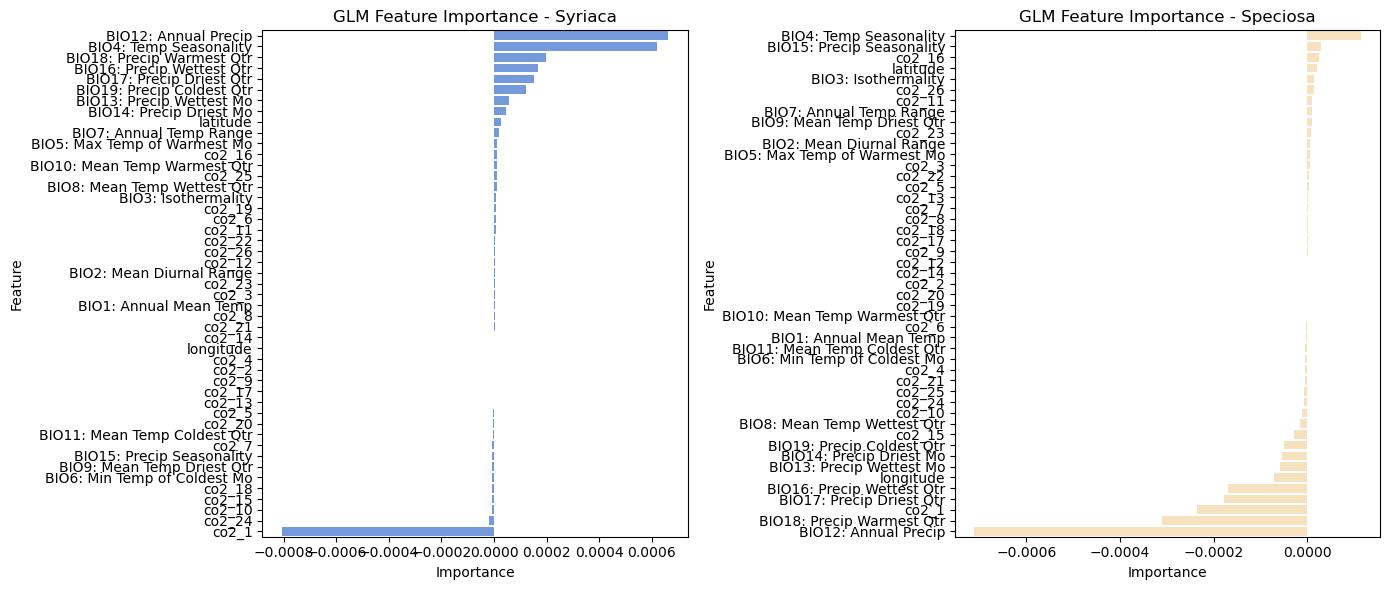

In [31]:
# Load the feature importances dataframes for GLM (Logistic Regression)
df_sy_glm = feature_importance_dfs["syriaca_glm"].copy()
df_sp_glm = feature_importance_dfs["speciosa_glm"].copy()

# Check the columns before renaming
print("Columns in df_sy_glm before rename:", df_sy_glm.columns)
print("Columns in df_sp_glm before rename:", df_sp_glm.columns)

# Rename the 'Importance' column for both species to a more descriptive name
df_sy_glm.rename(columns={"Importance": "importance_syriaca_glm"}, inplace=True)
df_sp_glm.rename(columns={"Importance": "importance_speciosa_glm"}, inplace=True)

# Check the columns after renaming
print("Columns in df_sy_glm after rename:", df_sy_glm.columns)
print("Columns in df_sp_glm after rename:", df_sp_glm.columns)

# Merge them on feature names
df_merged_glm = pd.merge(df_sy_glm, df_sp_glm, on="Feature")

# Sort by average importance for clearer plotting
df_merged_glm["mean_importance"] = df_merged_glm[["importance_syriaca_glm", "importance_speciosa_glm"]].mean(axis=1)
df_merged_glm = df_merged_glm.sort_values(by="mean_importance", ascending=True)

# Plot histograms side by side
plt.figure(figsize=(14, 6))

# Plot for Syriaca (GLM)
plt.subplot(1, 2, 1)
sns.barplot(data=df_sy_glm, x="importance_syriaca_glm", y="Feature", color="cornflowerblue")
plt.title("GLM Feature Importance - Syriaca")
plt.xlabel("Importance")
plt.ylabel("Feature")

# Plot for Speciosa (GLM)
plt.subplot(1, 2, 2)
sns.barplot(data=df_sp_glm, x="importance_speciosa_glm", y="Feature", color="moccasin")
plt.title("GLM Feature Importance - Speciosa")
plt.xlabel("Importance")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()
